<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIPS                        186 non-null    int64  
 1   Name                        186 non-null    object 
 2   State                       186 non-null    object 
 3   Geography                   186 non-null    object 
 4   Year                        186 non-null    int64  
 5   Time                        186 non-null    int64  
 6   Unemployment Rate           185 non-null    float64
 7   Population Estimate         186 non-null    int64  
 8   Per capita personal income  186 non-null    int64  
 9   EV registered               186 non-null    int64  
 10  EV charging stations        186 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 16.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 185
Data columns (total 11 c

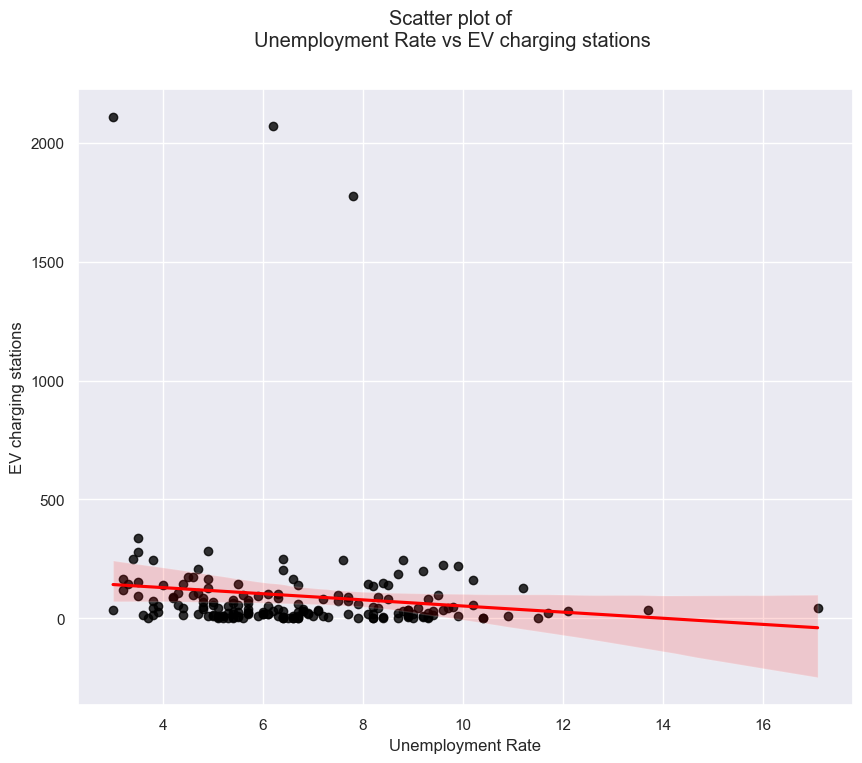

[  43  197   60   45   36    1  129   34  159   21   79  138   80   97
   44   29    6   72   17   96    0    9    2   48   90   57  149    3
   24    5    1   10    0   29   21   18   13 1779   74   34    0   29
    1   11   15    9    0  225   19   49   10  246  186    4  135    2
   30   79   22   35   60  219   85   75   35    1  143   44  202   29
  127  145  103   95   53   38   21   89   18  102   10    9    2   42
   96   63  163    8   27    5    0    7    0   27   25   18   16 2072
   87   41    2   32    1   13   17    9    2  243   19   57   10  249
  165    4  138    2   30   87   17   55   76  339   92   88   39    1
  208   71  247   33  142  277  153  166   50   67   37  120   28  140
   14    9    2   47   96   63  172    8   28    5    0   11    0   26
   32   18   23 2109  108   55    4   37   10   16   17    9    2  284
   15   68   10  250  175    5  145    2   41  106   15   50]
[[ 4.62817847e+00 -2.51670160e-02 -5.02169093e-01 -1.70582130e-01]
 [ 1.10539195e+00  

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = "C:/Users/gtash/OneDrive/Desktop/EV_WA_NJ/Combined_updated/"

# # Read data from the input file
input_file = path + "Combines_NJ_WA_Long_Form.csv"
data = pd.read_table(input_file, delimiter=',', header=[0])
data.info(verbose = True, show_counts=True)


# Filter the data to include only county rows
data2 = data[ data['Geography'] == "County" ]
data2.info(verbose = True, show_counts=True) 


# descriptive statistics
data2.describe()

data2.describe().to_csv(path + "Descriptive Stats.csv")


########### correlations

df_subset = data2[["EV charging stations", "Unemployment Rate", 
                   "Population Estimate", "Per capita personal income",
                   "EV registered"]]
correlation_matrix = df_subset.corr()
print("correlation matrix")
print(correlation_matrix)



############ density plot for EV Charging Stations
import seaborn as sns 
import matplotlib.pyplot as plt 

var_name = "EV charging stations"
var_title = "Density Plot for " + var_name
print(var_title, var_name)  

fig, ax = plt.subplots(figsize=(7, 5))  
plt.ticklabel_format(style='plain')
plt.xlabel(var_title)
plt.ylabel("Frequency")
plt.title(var_title)

# plotting density plot for carat using distplot() 
sns.kdeplot(np.array( data2[ var_name ] ), bw_method = 0.5)



# scatterplot with best fit regression line
import seaborn as sns   
x_var = data2['Unemployment Rate']
y_var = data2['EV charging stations']

x_name = 'Unemployment Rate'
y_name = 'EV charging stations'

plt.close()

fig, ax = plt.subplots(figsize=(10, 8))  
sns.set(font_scale=1.0)

ax = sns.regplot(data2, x = x_var, y = y_var, 
    scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.suptitle("Scatter plot of \n" + x_name + " vs " + y_name)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.ticklabel_format(style='plain')
plt.show()

plt.savefig(path + "ScatterPlot_Unemployment_Rate.jpg")

  

############# Extract data from the data frame into arrays y and x ;Y dependent variable

y = data2["EV charging stations"].values 

x = data2[['Unemployment Rate', 'Population Estimate', 
           'Per capita personal income', 'EV registered']].values.reshape(-1, 4)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(x)
x = X_scaled

print(y)

print(x)


# add y intercept
import statsmodels.api as sm
x = sm.add_constant(x)  # add y-intercept
print(x)

################# create the train/test split    
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(x, y, 
                test_size = 0.20, random_state = 11) 

# fit the linear regression model in sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
skreg = LinearRegression().fit(train_X, train_y)

# set up the cross-validation 
from sklearn.model_selection import cross_val_predict, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=11)   


import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_predict

# Predict train from KFold cross-validation
y_pred = cross_val_predict(skreg, train_X, train_y, cv=kfold, method='predict')
# Compute RMSE and MSE
mse_kfold_train = MSE(train_y, y_pred)
rmse_kfold_train = np.sqrt(mse_kfold_train)
print("KFold MSE train: % f" %(mse_kfold_train))
print("KFold RMSE train : % f" %(rmse_kfold_train))

# Predict test from KFold cross-validation    
y_pred = cross_val_predict(skreg, test_X, test_y, cv=kfold, method='predict')
# Compute RMSE and MSE
mse_kfold_test = MSE(test_y, y_pred)
rmse_kfold_test = np.sqrt(mse_kfold_test)
print("KFold MSE test: % f" %(mse_kfold_test))
print("KFold RMSE test: % f" %(rmse_kfold_test))


# fit the linear regression model in stats models
import statsmodels.api as sm
model = sm.OLS(train_y, train_X)    
ols_fit = model.fit()
ols_fit.summary()

# Predict train from OLS
ols_pred_train = ols_fit.predict(train_X) 
mse_ols_train = ols_fit.mse_model
rmse_ols_train = np.sqrt(ols_fit.mse_model)
print("OLS MSE train: % f" %(mse_ols_train))
print("OLS RMSE train: % f" %(rmse_ols_train))

# Predict test from OLS
ols_pred_test = ols_fit.predict(test_X)
mse_ols_test = MSE(test_y, ols_pred_test)
rmse_ols_test = np.sqrt(mse_ols_test)
print("OLS MSE test: % f" %(mse_ols_test))
print("OLS RMSE test: % f" %(rmse_ols_test))
    
print( ols_fit.summary())



        
